# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [1]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [2]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

,epoch,acc,loss,val_acc,val_loss
0,1,0.623789,0.647563,0.629708,0.643968
1,2,0.628375,0.644117,0.632054,0.641899
2,3,0.630921,0.642211,0.633978,0.640616
3,4,0.632635,0.640973,0.635047,0.639751
4,5,0.633824,0.640085,0.636288,0.639122
5,6,0.634710,0.639405,0.636382,0.638639
6,7,0.635419,0.638859,0.636830,0.638253
7,8,0.636023,0.638405,0.637465,0.637936
8,9,0.636529,0.638021,0.637746,0.637670
9,10,0.636956,0.637688,0.637862,0.637443


### Training accuracy

<Figure size 432x288 with 0 Axes>

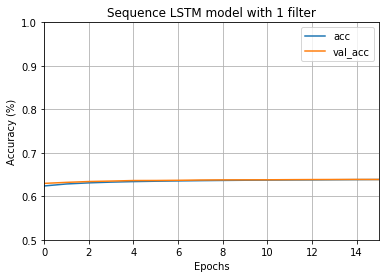

In [3]:
training_acc_columns = [x for x in list(training_df.columns) if "acc" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Sequence LSTM model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.ylim([0.5,1.0])

plt.show()

### Training loss

<Figure size 432x288 with 0 Axes>

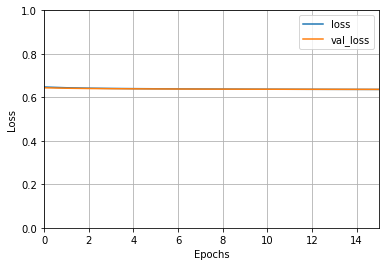

In [4]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.0,1.0])

plt.show()

## Evaluation

In [7]:
with open(os.path.join(root, "output", "two.json")) as fp:
    df1 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "five.json")) as fp:
    df2 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "ten.json")) as fp:
    df3 = pandas.read_json(fp).T

Each point in the boxplot is the accuracy for one subject

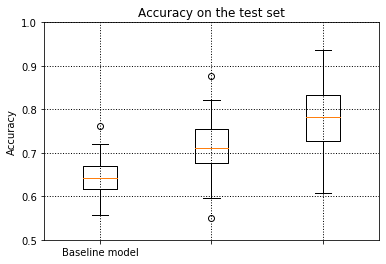

In [9]:
plt.figure()
plt.grid(color='black', linestyle=':', linewidth=1)
plt.boxplot([df1[["acc"]].T.values[0], df2[["acc"]].T.values[0], df3[["acc"]].T.values[0]])
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.title("Accuracy on the test set")
plt.xticks(plt.xticks()[0], ["Baseline model"])
plt.show()